In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df=pd.read_csv("StudentDetails.csv")
df.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,Yes,5,No
1,5,80,60,No,6,Yes
2,8,90,75,Yes,8,Yes
3,3,70,50,Yes,5,No
4,7,85,70,No,7,Yes


In [3]:
label_en=LabelEncoder()
df['Internet']=label_en.fit_transform(df['Internet'])
df['Passed']=label_en.fit_transform(df['Passed'])

In [4]:
df.head()

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,1,5,0
1,5,80,60,0,6,1
2,8,90,75,1,8,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1


In [8]:
scaler=StandardScaler()
features=['StudyHours','Attendance','PastScore','SleepHours']
scaled_df=df.copy()
scaled_df[features]=scaler.fit_transform(df[features])

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



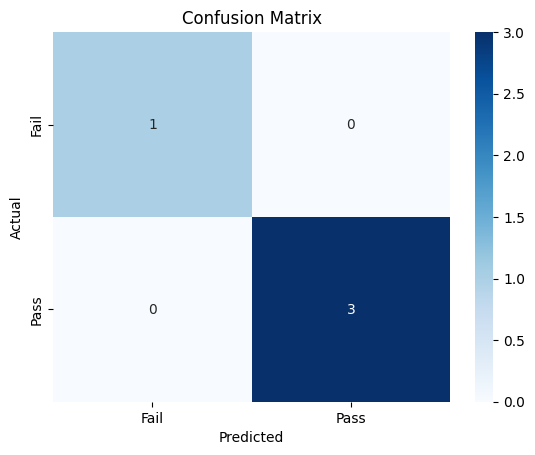

In [26]:
X=scaled_df[features]
y=scaled_df['Passed']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Classification report")
print(classification_report(y_test,y_pred))

confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True,cmap="Blues",xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'],fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
print("------Show Your Result------")
try:
    studyhours=float(input("Enter your study hours :"))
    attendance=float(input("Enter your attendance score :"))
    pastscore=float(input("Enter your past score :"))
    sleephours=float(input("Enter your sleeping hours :"))

    user_input_df=pd.DataFrame([{
    'StudyHours':studyhours,
    'Attendance':attendance,
    'PastScore':pastscore,
    'SleepHours':sleephours
    }])

    user_input_scale=scaler.fit_transform(user_input_df)
    predicted_result=model.predict(user_input_scale)[0]
    if predicted_result==1:
        print("Pass")
    else:
        print("Fail")
except Exception as e:
    print(f"An error occured :{e}")

------Show Your Result------


Enter your study hours : 5
Enter your attendance score : 80
Enter your past score : 70
Enter your sleeping hours : 9


Pass


C:\Users\satyajit\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
